## Make N3 and N4 in Mei-Yin-Chou

In [1]:
%run notebook_setup.ipy
import sys 
sys.path.append('/Users/ssrinivasan/ArtificialLattice/StructGen/src/')
sys.path.append('/Users/ssrinivasan/Quantum/4x4/sandbox/structs/4x4/')
from glob import glob
import numpy as np 
from TopoQuest.utilities import terminate_edges
from TopoQuest.StructGen import StructGen 
import random
import kwant
from ipywidgets import interact
import scipy.linalg as la 
import matplotlib.pyplot as plt

In [2]:
base = '/Users/ssrinivasan/Quantum/4x4/sandbox/structs/4x4/'
nontrivial = np.loadtxt('/Users/ssrinivasan/Quantum/4x4/sandbox/orig_z2.dat',usecols=1)
full_id_list = np.array([i for i in range(100)])
trivial = [item for item in full_id_list if item not in nontrivial]
#rnt = base+'POSCAR.4'
#rnt2 = base+'POSCAR.91'
#rnt = base+'POSCAR.{}'.format(int(random.choice(nontrivial)))
rnt = base+'POSCAR.37'
rnt2 = base+'POSCAR.{}'.format(int(random.choice(nontrivial)))
#rt = base+'POSCAR.{}'.format(int(random.choice(trivial)))
rt = base+'POSCAR.28'
rt2 = base+'POSCAR.{}'.format(int(random.choice(trivial)))
#print('Trivial structs selected:')
#print(rt)
#print(rt2)
print('=========================')
print('Non-trivial structs selected:')
print(rnt)
print(rnt2)

Non-trivial structs selected:
/Users/ssrinivasan/Quantum/4x4/sandbox/structs/4x4/POSCAR.37
/Users/ssrinivasan/Quantum/4x4/sandbox/structs/4x4/POSCAR.22


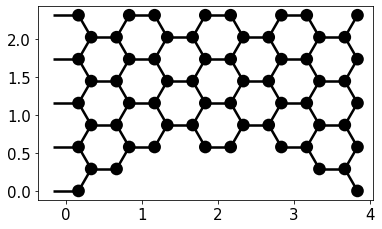

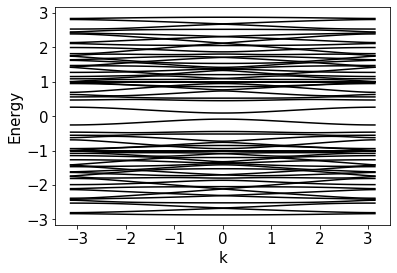

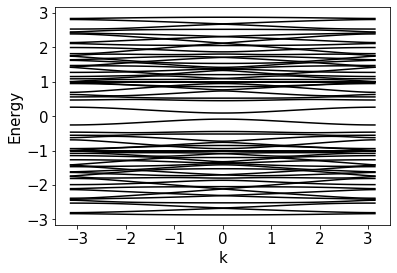

In [3]:
gen_nt = StructGen('Armchair',nlx=4,nly=4) 
gen_nt.poscar2syst(rnt)
gen_nt.plot_syst()
nt_syst = gen_nt.get_syst()
kwant.plotter.bands(nt_syst.finalized())

#gen_nt2 = StructGen('Armchair',nlx=4,nly=4) 
#gen_nt2.poscar2syst(rnt2)
#gen_nt2.plot_syst()
#nt_syst2 = gen_nt2.get_syst()
#nt_syst2 = terminate_edges(nt_syst2,-0.5)
#kwant.plotter.bands(nt_syst2.finalized())

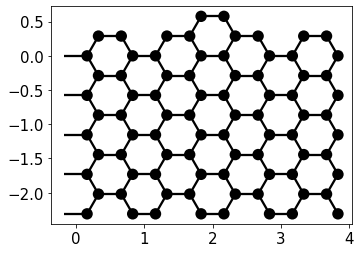

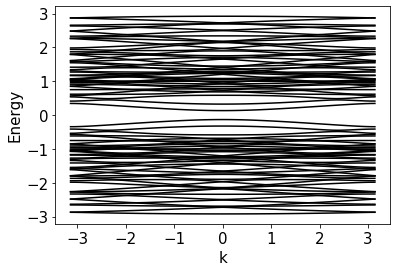

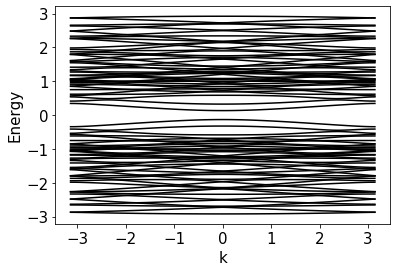

In [4]:
gen_tt = StructGen('Armchair',nlx=4,nly=4)
gen_tt.poscar2syst(rt) 
gen_tt.plot_syst()
tt_syst = gen_tt.get_syst()
kwant.plotter.bands(tt_syst.finalized())

#gen_tt2 = StructGen('Armchair',nlx=4,nly=4)
#gen_tt2.poscar2syst(rt2) 
#gen_tt2.plot_syst()
#tt_syst2 = gen_tt2.get_syst()
#kwant.plotter.bands(tt_syst2.finalized())

In [5]:
def make_junction(syst1,syst2,lx1,lx2,ly,xoff=0,yoff=0):
    lx = lx1 + lx2
    nx = 3
    nx1 = nx 
    nx2 = nx
    pos_all0 = []
    #pos1 =  [[site.pos[0],site.pos[1]] for site in syst1.sites()]
    #pos2 =  [[site.pos[0],site.pos[1]] for site in syst2.sites()]
    for i in range(nx1):
        pos1 =  [[site.pos[0] + i*lx1,site.pos[1]] for site in syst1.sites()]
        pos_all0 += pos1
    for i in range(nx2): 
        pos2 =  [[site.pos[0] + nx1*lx1 + i*lx2+xoff,site.pos[1]+yoff] for site in syst2.sites()]
        pos_all0 += pos2
    pos_all = pos_all0
    #pos_all = []
    #for item in pos_all0:
    #    if item not in pos_all: 
    #        pos_all.append(item)
        #print(item)

    min_y = np.min(np.array(pos_all)[:,1])
    lat = kwant.lattice.general([[nx*lx,0],[0,3*ly]],pos_all,norbs=1)
    #syst = kwant.Builder(kwant.TranslationalSymmetry([lx,0]))
    syst = kwant.Builder()
    syst[lat.shape((lambda pos: 0< pos[0]< nx*lx+xoff and min_y <=pos[1]<ly),(0,0))] = 0 
    syst[lat.neighbors()] = -1 
    print(len(pos1),len(pos2),len(pos_all))
    return syst 

def plot_wf(syst,i_start,i_end,ham):
    """Plot the wave function mapping on system with Hamiltonian 
    "ham" in a PyWidget starting from band index i_start and 
    ending at i_end"""
    eig_val,eig_vec = la.eigh(ham)
    def plot_band(i=0): 
        print("Plotting wave function with index",i)
        print("Energy of the corresponding mode",eig_val[i], "x t")
        fig = plt.figure(figsize=(16,3))
        kwant.plotter.map(syst,abs(eig_vec[:,i])**2,oversampling=50,fig_size=(16,10))
        plt.axis('off')
        fig.savefig('figures/%s.jpg'%i,dpi=600,quality=300,transparent=True)
    interact(plot_band,i=(i_start,i_end))
    
def check_junction(syst1,syst2,lx1,lx2,ly=14,xoff=0,yoff=0):
    syst = make_junction(syst1,syst2,lx1,lx2,ly,xoff,yoff)
    #syst.eradicate_dangling()
    kwant.plot(syst,site_color='black');
    #gen = StructGen('Armchair',nlx=40,nly=4)
    #gen.syst = syst 
    #gen.syst2poscar('POSCAR.junction')
    
    nbands = len(syst.sites())
    n1 = int(nbands/2 -5)
    n2 = int(nbands/2 +5)
    print('Number of bands in junction is {}'.format(nbands))
    
    syst_fin = syst.finalized()
    ham = syst_fin.hamiltonian_submatrix() 
    fig = plot_wf(syst_fin,n1,n2,ham)
    return syst

In [6]:
gen_nt.get_pol()


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-09-11 14:50:31,729                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(7, 1001, 2)                                      |
|  line:        <function calc_pol.<locals>.<lambda> at 0x11d32dd90>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

0.49999999999999467

In [9]:
check_junction(nt_syst,nt_syst2,lx1=4,lx2=4,ly=4)

NameError: name 'nt_syst2' is not defined

62 82 432


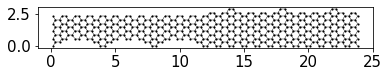

In [ ]:
from helper import Zigzag
tt_syst_pos = np.array([site.pos for site in tt_syst.sites()])
yoff = np.min(tt_syst_pos[:,1])
syst = check_junction(nt_syst,tt_syst,lx1=4,lx2=4,ly=4,yoff=-1*yoff)

In [36]:
poscarGen = StructGen(nlx=24,nly=8)
poscarGen.syst = syst 
poscarGen.plot_syst()

ValueError: No sites close to (0, 0) are inside the desired shape.

In [ ]:
check_junction(tt_syst2,tt_syst,lx1=4,lx2=4,ly=4)

In [ ]:
from utilities import Armchair

def make_armchair_ribbon(N=7, L = 5): 
    """Returns a zigzag nanoribbon
    with length L and width of N carbon atoms

    Parameters:
    ==========

    N = Number of C atoms (width)
    L = Length of the nanoribbon along -x direction

    Returns:
    =======
    Instance of kwant.Builder() with the desired nanoribbon geometery
    """
    width = N/2*np.sqrt(3)/3.0 
    length = L/4*1

    Z_ribbon = kwant.Builder(kwant.TranslationalSymmetry([1,0]))
    Z_ribbon[Armchair.shape((lambda pos: pos[1] >= 0 and pos[1] < width and pos[0] >= 0 and pos[0] < length), (0,0))] = 1 
    Z_ribbon[Armchair.neighbors()] = -1
    return Z_ribbon


In [ ]:
from helper import finite_to_1D
arm_dash = make_armchair_ribbon(N=9,L=4)
#sites = [site for site in arm.sites()]

#for site in sites: 
#    if site.pos[0] > 1 and site.pos[1] <= 2.1: 
#        del arm[site]
#    if site.pos[0] < 0.5 and site.pos[1] > 2.1: 
#        del arm[site]
#for site in sites: 
#    if 0 <= site.pos[0] < 0.8 and site.pos[1] < 0.5: 
#        del temp[site]
#S3 = temp
#arm_dash = finite_to_1D(arm,0.9999999999,trans_sym_direction='x')
#kwant.plot(S3);
#kwant.plot(temp);


kwant.plot(arm_dash);

In [ ]:
wcc_N={}
import z2pack
from Z2_compute import zak_bands as zak_bands_z2
#cove_ribbon = cove_ribbon.finalized()
S1 = arm_dash
pos = [ site.pos for  site in S1.sites()]
nsites = len(pos)
print(nsites)
S1 = S1.finalized()
kwant.plotter.bands(S1)
S1_lattice = kwant.lattice.general([[1,0],[0,3]],pos)
act_pos = np.array([S1.pos(i) for i in range(nsites)])
a1,a2 = [S1_lattice.prim_vecs[0][0],3]
red_pos = np.zeros(np.shape(act_pos))
red_pos[:,0] = act_pos[:,0]/a1
red_pos[:,1] = act_pos[:,1]/a2


ham_k=zak_bands_z2(S1,momenta=1001,dim=2)
z2_system = z2pack.hm.System(ham_k,dim=2,#pos=red_pos,
                                     convention=2)
result = z2pack.line.run(system=z2_system, 
                            line=lambda t1: [t1,0])#,#,n/(N+1)])#,
                            #pos_tol=1e-3,iterator=range(200,500,2));

print("Polarization:",result.pol)

In [ ]:
for i in range(0,1): 
    print(i)

In [ ]:
gen_check = StructGen(lx=1,ly=7/2*np.sqrt(3)/3)
gen_check.syst = arm_dash
gen_check.get_pol()

In [31]:
rnt

'/Users/ssrinivasan/transfer/4x4/sandbox/structs/4x4/POSCAR.37'

In [32]:
rt

'/Users/ssrinivasan/transfer/4x4/sandbox/structs/4x4/POSCAR.28'